In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('domains.csv')

In [4]:
df.head()

,host,domain,class,subclass
0,000directory.com.ar,000directory,legit,legit
1,000webhost.com,000webhost,legit,legit
2,001fans.com,001fans,legit,legit
3,01-telecharger.com,01-telecharger,legit,legit
4,010shangpu.com,010shangpu,legit,legit


In [5]:
df.shape

(133926, 4)

# Create some features

In [6]:
#basic string features:

def string_length(s):
    length = len(s)
    return length

def string_number_count(s):
    numbers = sum(c.isdigit() for c in s)
    return numbers

def string_alpha_count(s):
    alpha = sum(c.isalpha() for c in s)
    return alpha

def others(s):
    numbers = sum(c.isdigit() for c in s)
    alpha = sum(c.isalpha() for c in s)
    spaces  = sum(c.isspace() for c in s)
    others = len(s) - numbers - alpha - spaces
    return others

def entropy(string):
        #"Calculates the Shannon entropy of a string"
        prob = [ float(string.count(c)) / len(string) for c in dict.fromkeys(list(string)) ]
        # calculate the entropy
        entropy = - sum([ p * math.log(p) / math.log(2.0) for p in prob ])
        return entropy

#extract the Top-Level-Domain
def find_tld(s):
    domains = s.split(".")
    tld = domains[-1]
    return tld


def shorten(tld):
    return tld[:4]

#find the second-level domains if present

def two_LD(s):
    domains = s.split(".")
    twold = domains[-2]
    return twold

#count vowels

vowels = ['a','e','i','o','u','y']
def vowel_count(string):
    vcount = 0
    for i in vowels:
        vcount += str(string).count(i)
    return vcount

def num_domains(column):
    return str(column).count('.')+1


#find substrings of consecutive consonants/numbers (max length and average)

import re
#def find_gibberish(string):
#    gibberish = []
#    abcs= re.findall(r'[a-zA-Z]+', string)
#    for i in abcs:
#        cons = re.findall(r'[^aeiou]{3,}', string)
#        for j in cons:
#            gibberish.append(j)
#    return gibberish

def find_gibberish(string):
    gibberish = []
    gibs = re.findall(r'[^aeiou]{3,}', string)
    for j in gibs:
        gibberish.append(j)
    return gibberish


def list_len(column):
    return len(column)

def avg_len(column):
    total = 0
    for i in column:
        total += len(i)
    if len(column) > 0:
        return float(total)/len(column)
    else:
        return 0

def find_max(column):
    if len(column)>0:
        return len(max(column, key=len))
    else:
        return 0

    
    
#apply functions to build basic features

df['numbers'] = df['domain'].apply(string_number_count)
df['other_chars'] = df['domain'].apply(others)
df['alpha'] = df['domain'].apply(string_alpha_count)
df['length'] = df['domain'].apply(string_length)
df['entropy'] = df['domain'].apply(entropy)
df['TLD'] = df['host'].apply(find_tld)
df['short_tld'] = df['TLD'].apply(shorten)
df['tld_entropy']=df['TLD'].apply(entropy)
df['tld_length']=df['TLD'].apply(string_length)
df['2LD']=df['host'].apply(two_LD)
df['2LD_length']=df['2LD'].apply(string_length)
df['2LD_entropy']=df['2LD'].apply(entropy)
df['vowel_count']=df['domain'].apply(vowel_count)
df['v_ratio']=df['vowel_count']/df['length']
df['num_domains']=df['host'].apply(num_domains)

df['num_density']=df['numbers']/df['length']

df['gibberish']=df['domain'].apply(find_gibberish)
df['gibberish_amount']=df['gibberish'].apply(list_len)
df['gibberish_avg']=df['gibberish'].apply(avg_len)
df['gibberish_max']=df['gibberish'].apply(find_max)


#want to create a list of common TLDs, to prevent a long-tail distribution problem with too many classes

common_list= []

#add frequent TLDs:

def guest_list(column):
    x = len(column)
    xx = column.value_counts()
    xdict = xx.to_dict().items()
    threshold = len(column)*.005
    for k, v in xdict:
        if v > threshold:
            common_list.append(k)

def known_terms(artifact):
    string= str(artifact).lower()
    if string in common_list:
        return string
    else:
        return 'unknown'

def guest_list(column):
    x = len(column)
    xx = column.value_counts()
    xdict = xx.to_dict().items()
    threshold = len(column)*.005
    for k, v in xdict:
        if v > threshold:
            common_list.append(k)
            
common_list= []
guest_list(df['TLD'])
df['common_TLD'] = df['TLD'].apply(known_terms)


## Read in english words

In [7]:
from random import choice
import string

dictionary = set(open('dictionary.txt','r').read().lower().split())
max_len = max(map(len, dictionary)) #longest word in the set of words

def find_words(column):
    text = column
#text += '-'+text[::-1] #append the reverse of the text to itself

    words_found = [] #set of words found, starts empty
    for i in xrange(len(text)): #for each possible starting position in the corpus
        chunk = text[i:i+max_len+1] #chunk that is the size of the longest word
        for j in xrange(1,len(chunk)+1): #loop to check each possible subchunk
            word = chunk[:j] #subchunk
            if word in dictionary: #constant time hash lookup if it's in dictionary
                words_found.append(word) #add to set of words

    return words_found

df['english_words']=df['domain'].apply(find_words)

df['words_count']=df['english_words'].apply(list_len)
df['words_avg']=df['english_words'].apply(avg_len)
df['words_max']=df['english_words'].apply(find_max)

In [8]:
df.head()

,host,domain,class,subclass,numbers,other_chars,alpha,length,entropy,TLD,...,num_density,gibberish,gibberish_amount,gibberish_avg,gibberish_max,common_TLD,english_words,words_count,words_avg,words_max
0,000directory.com.ar,000directory,legit,legit,3,0,9,12,3.022055,ar,...,0.250000,[000d],1,4.0,4,unknown,"[dire, direct, director, directory, ire, recto...",7,5.714286,9
1,000webhost.com,000webhost,legit,legit,3,0,7,10,2.846439,com,...,0.300000,[000w],1,4.0,4,com,"[web, host]",2,3.500000,4
2,001fans.com,001fans,legit,legit,3,0,4,7,2.521641,com,...,0.428571,[001f],1,4.0,4,com,"[fan, fans]",2,3.500000,4
3,01-telecharger.com,01-telecharger,legit,legit,2,1,11,14,3.324863,com,...,0.142857,[01-t],1,4.0,4,com,"[char, charge, charger]",3,5.666667,7
4,010shangpu.com,010shangpu,legit,legit,3,0,7,10,3.121928,com,...,0.300000,"[010sh, ngp]",2,4.0,5,com,"[han, hang]",2,3.500000,4


In [59]:
list(df)

['host',
 'domain',
 'class',
 'subclass',
 'numbers',
 'other_chars',
 'alpha',
 'length',
 'entropy',
 'TLD',
 'short_tld',
 'tld_entropy',
 'tld_length',
 '2LD',
 '2LD_length',
 '2LD_entropy',
 'vowel_count',
 'v_ratio',
 'num_domains',
 'num_density',
 'gibberish',
 'gibberish_amount',
 'gibberish_avg',
 'gibberish_max',
 'common_TLD',
 'english_words',
 'words_count',
 'words_avg',
 'words_max',
 'is_bad',
 'cryptolocker',
 'goz',
 'legit',
 'newgoz']

In [10]:
df.describe()

,numbers,other_chars,alpha,length,entropy,tld_entropy,tld_length,2LD_length,2LD_entropy,vowel_count,v_ratio,num_domains,num_density,gibberish_amount,gibberish_avg,gibberish_max,words_count,words_avg,words_max
count,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000
mean,0.759136,0.052686,12.507459,13.319288,3.146513,1.275650,2.478152,12.813382,3.043955,3.959873,0.324199,2.071793,0.033270,1.103468,3.738513,4.330369,2.490823,2.781192,3.617207
std,2.466659,0.247749,4.614114,5.713475,0.472540,0.302941,0.521092,6.238125,0.652255,1.730825,0.131434,0.260135,0.101895,1.023762,3.806115,4.547830,2.644553,1.939346,2.842597
min,0.000000,0.000000,0.000000,7.000000,-0.000000,-0.000000,2.000000,1.000000,-0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,9.000000,2.807355,1.000000,2.000000,9.000000,2.750000,3.000000,0.230769,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,12.000000,12.000000,3.121928,1.000000,2.000000,12.000000,3.095795,4.000000,0.333333,2.000000,0.000000,1.000000,3.000000,3.000000,2.000000,3.333333,4.000000
75%,0.000000,0.000000,15.000000,15.000000,3.408229,1.584963,3.000000,15.000000,3.392747,5.000000,0.428571,2.000000,0.000000,2.000000,5.333333,6.000000,4.000000,4.166667,6.000000
max,21.000000,11.000000,45.000000,56.000000,4.504706,3.169925,9.000000,56.000000,4.504706,18.000000,0.900000,4.000000,1.000000,11.000000,28.000000,28.000000,23.000000,12.000000,18.000000


## Evaluate some variables

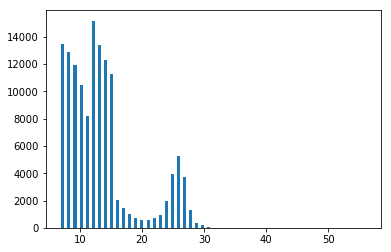

In [11]:
plt.hist(df['length'], bins = 100)
plt.show()

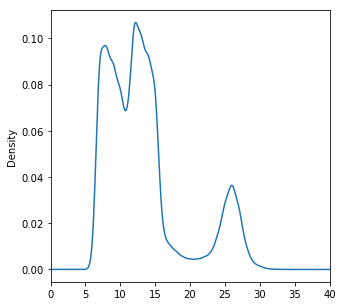

In [12]:
df['length'].plot(kind="density",
              figsize=(5,5), xlim=(0,40))

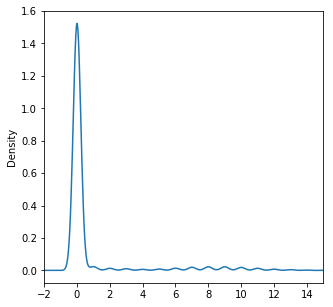

In [13]:
df['numbers'].plot(kind='density', figsize=(5,5), xlim=(-2,15))

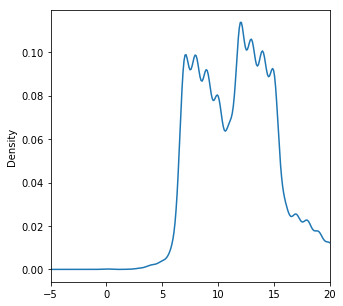

In [14]:
df['alpha'].plot(kind="density",
              figsize=(5,5), xlim = (-5,20))

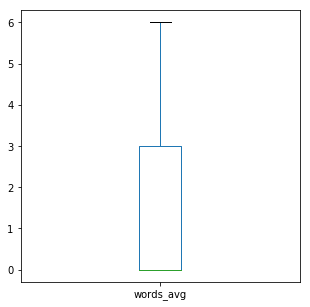

In [93]:
df[df['is_bad']==1]['words_avg'].plot(kind="box",
              figsize=(5,5))

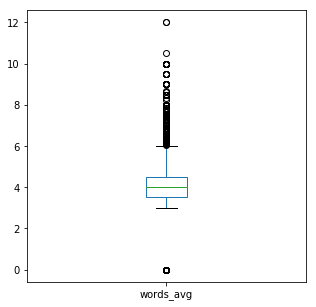

In [92]:
df[df['is_bad']==0]['words_avg'].plot(kind="box",
              figsize=(5,5))

## Encode Target Variable

In [15]:
def is_bad(string):
    if string == 'dga':
        return 1
    else:
        return 0

In [16]:
df['is_bad']=df['class'].apply(is_bad)

In [17]:
df.head()

,host,domain,class,subclass,numbers,other_chars,alpha,length,entropy,TLD,...,gibberish,gibberish_amount,gibberish_avg,gibberish_max,common_TLD,english_words,words_count,words_avg,words_max,is_bad
0,000directory.com.ar,000directory,legit,legit,3,0,9,12,3.022055,ar,...,[000d],1,4.0,4,unknown,"[dire, direct, director, directory, ire, recto...",7,5.714286,9,0
1,000webhost.com,000webhost,legit,legit,3,0,7,10,2.846439,com,...,[000w],1,4.0,4,com,"[web, host]",2,3.500000,4,0
2,001fans.com,001fans,legit,legit,3,0,4,7,2.521641,com,...,[001f],1,4.0,4,com,"[fan, fans]",2,3.500000,4,0
3,01-telecharger.com,01-telecharger,legit,legit,2,1,11,14,3.324863,com,...,[01-t],1,4.0,4,com,"[char, charge, charger]",3,5.666667,7,0
4,010shangpu.com,010shangpu,legit,legit,3,0,7,10,3.121928,com,...,"[010sh, ngp]",2,4.0,5,com,"[han, hang]",2,3.500000,4,0


In [88]:
df[df['is_bad']==1]['words_avg']

71        3.000000
72        0.000000
73        0.000000
82        0.000000
84        0.000000
88        3.000000
94        0.000000
97        0.000000
101       0.000000
102       0.000000
103       0.000000
104       3.500000
105       0.000000
119       0.000000
120       0.000000
121       0.000000
123       0.000000
124       0.000000
125       3.000000
126       0.000000
127       0.000000
128       0.000000
129       0.000000
130       3.000000
131       0.000000
132       0.000000
133       0.000000
134       3.000000
135       0.000000
136       0.000000
            ...   
133881    0.000000
133882    0.000000
133883    0.000000
133884    3.000000
133885    3.000000
133886    3.500000
133887    3.000000
133888    3.333333
133889    0.000000
133890    0.000000
133891    3.000000
133892    0.000000
133893    3.000000
133894    3.000000
133896    3.000000
133897    0.000000
133898    0.000000
133899    0.000000
133904    0.000000
133905    3.000000
133906    0.000000
133907    0.

In [18]:
df.subclass.unique()

array(['legit', 'newgoz', 'cryptolocker', 'goz'], dtype=object)

In [19]:
dg_dummies = pd.get_dummies(df['subclass'])
dg_dummies.head()

,cryptolocker,goz,legit,newgoz
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [20]:
df = pd.concat([df,dg_dummies], axis = 1)

In [21]:
df.head()

,host,domain,class,subclass,numbers,other_chars,alpha,length,entropy,TLD,...,common_TLD,english_words,words_count,words_avg,words_max,is_bad,cryptolocker,goz,legit,newgoz
0,000directory.com.ar,000directory,legit,legit,3,0,9,12,3.022055,ar,...,unknown,"[dire, direct, director, directory, ire, recto...",7,5.714286,9,0,0,0,1,0
1,000webhost.com,000webhost,legit,legit,3,0,7,10,2.846439,com,...,com,"[web, host]",2,3.500000,4,0,0,0,1,0
2,001fans.com,001fans,legit,legit,3,0,4,7,2.521641,com,...,com,"[fan, fans]",2,3.500000,4,0,0,0,1,0
3,01-telecharger.com,01-telecharger,legit,legit,2,1,11,14,3.324863,com,...,com,"[char, charge, charger]",3,5.666667,7,0,0,0,1,0
4,010shangpu.com,010shangpu,legit,legit,3,0,7,10,3.121928,com,...,com,"[han, hang]",2,3.500000,4,0,0,0,1,0


In [22]:
df.corr()

,numbers,other_chars,alpha,length,entropy,tld_entropy,tld_length,2LD_length,2LD_entropy,vowel_count,...,gibberish_avg,gibberish_max,words_count,words_avg,words_max,is_bad,cryptolocker,goz,legit,newgoz
numbers,1.000000,-0.059571,0.237136,0.620650,0.515210,0.303327,0.297879,0.592279,0.419275,-0.030093,...,0.436757,0.539818,-0.246510,-0.320028,-0.301923,0.336344,-0.180648,-0.074146,-0.336344,0.947124
other_chars,-0.059571,1.000000,-0.051338,-0.023816,-0.020472,0.068737,0.069472,-0.030115,-0.026813,0.071535,...,-0.053514,-0.069181,0.106521,0.127464,0.131843,-0.171200,-0.124826,-0.051234,0.171200,-0.063612
alpha,0.237136,-0.051338,1.000000,0.907741,0.789290,-0.132473,-0.140243,0.858634,0.650691,0.454118,...,0.490669,0.574453,-0.077683,-0.305658,-0.233026,0.598379,0.126130,0.663778,-0.598379,0.313524
length,0.620650,-0.023816,0.907741,1.000000,0.858964,0.026951,0.018355,0.947820,0.705339,0.356851,...,0.582501,0.693977,-0.164542,-0.379484,-0.312821,0.621028,0.018456,0.501830,-0.621028,0.659337
entropy,0.515210,-0.020472,0.789290,0.858964,1.000000,-0.046549,-0.054931,0.823339,0.801718,0.239795,...,0.578714,0.661749,-0.201950,-0.392794,-0.332467,0.654288,0.185852,0.375185,-0.654288,0.557375
tld_entropy,0.303327,0.068737,-0.132473,0.026951,-0.046549,1.000000,0.982070,0.096497,0.107142,0.125366,...,-0.159551,-0.131684,0.307575,0.272353,0.298825,-0.407867,-0.534101,-0.219217,0.407867,0.305418
tld_length,0.297879,0.069472,-0.140243,0.018355,-0.054931,0.982070,1.000000,0.089110,0.101984,0.123352,...,-0.166251,-0.139009,0.311147,0.278169,0.304047,-0.416054,-0.538612,-0.221069,0.416054,0.299560
2LD_length,0.592279,-0.030115,0.858634,0.947820,0.823339,0.096497,0.089110,1.000000,0.855439,0.302577,...,0.584677,0.688758,-0.203321,-0.403468,-0.347419,0.634086,0.064508,0.479163,-0.634086,0.628144
2LD_entropy,0.419275,-0.026813,0.650691,0.705339,0.801718,0.107142,0.101984,0.855439,1.000000,0.158266,...,0.519671,0.583560,-0.229978,-0.390307,-0.350892,0.600595,0.226939,0.309693,-0.600595,0.450836
vowel_count,-0.030093,0.071535,0.454118,0.356851,0.239795,0.125366,0.123352,0.302577,0.158266,1.000000,...,-0.291383,-0.247301,0.361547,0.226721,0.291058,-0.105078,-0.249169,0.242559,0.105078,0.008082


In [94]:
df.corr()['is_bad']

numbers             0.336344
other_chars        -0.171200
alpha               0.598379
length              0.621028
entropy             0.654288
tld_entropy        -0.407867
tld_length         -0.416054
2LD_length          0.634086
2LD_entropy         0.600595
vowel_count        -0.105078
v_ratio            -0.641755
num_domains        -0.222181
num_density         0.280927
gibberish_amount    0.680586
gibberish_avg       0.699251
gibberish_max       0.741970
words_count        -0.619604
words_avg          -0.721847
words_max          -0.722711
is_bad              1.000000
cryptolocker        0.729126
goz                 0.299264
legit              -1.000000
newgoz              0.371563
Name: is_bad, dtype: float64

In [24]:
df.cov()

,numbers,other_chars,alpha,length,entropy,tld_entropy,tld_length,2LD_length,2LD_entropy,vowel_count,...,gibberish_avg,gibberish_max,words_count,words_avg,words_max,is_bad,cryptolocker,goz,legit,newgoz
numbers,6.084407,-0.036404,2.698948,8.746945,0.600527,0.226662,0.382880,9.113594,0.674568,-0.128478,...,4.100441,6.055651,-1.608035,-1.530918,-2.116999,0.405258,-0.194533,-0.041645,-0.405258,0.641436
other_chars,-0.036404,0.061379,-0.058687,-0.033712,-0.002397,0.005159,0.008969,-0.046543,-0.004333,0.030675,...,-0.050462,-0.077947,0.069791,0.061243,0.092850,-0.020718,-0.013501,-0.002890,0.020718,-0.004327
alpha,2.698948,-0.058687,21.290051,23.930435,1.720933,-0.185171,-0.337197,24.714429,1.958305,3.626687,...,8.617054,12.054429,-0.947906,-2.735141,-3.056387,1.348663,0.254071,0.697403,-1.348663,0.397188
length,8.746945,-0.033712,23.930435,32.643793,2.319071,0.046647,0.054648,33.781609,2.628549,3.528907,...,12.667140,18.032235,-2.486168,-4.204836,-5.080563,1.733207,0.046036,0.652874,-1.733207,1.034296
entropy,0.600527,-0.002397,1.720933,2.319071,0.223294,-0.006664,-0.013526,2.427010,0.247103,0.196125,...,1.040843,1.422120,-0.252369,-0.359964,-0.446584,0.151024,0.038340,0.040370,-0.151024,0.072314
tld_entropy,0.226662,0.005159,-0.185171,0.046647,-0.006664,0.091773,0.155030,0.182358,0.021171,0.065734,...,-0.183967,-0.181424,0.246412,0.160009,0.257330,-0.060355,-0.070637,-0.015122,0.060355,0.025403
tld_length,0.382880,0.008969,-0.337197,0.054648,-0.013526,0.155030,0.271537,0.289666,0.034663,0.111253,...,-0.329732,-0.329429,0.428778,0.281111,0.450371,-0.105902,-0.122529,-0.026231,0.105902,0.042858
2LD_length,9.113594,-0.046543,24.714429,33.781609,2.427010,0.182358,0.289666,38.914205,3.480652,3.266956,...,13.882007,19.540018,-3.354205,-4.881111,-6.160591,1.932150,0.175677,0.680628,-1.932150,1.075846
2LD_entropy,0.674568,-0.004333,1.958305,2.628549,0.247103,0.021171,0.034663,3.480652,0.425437,0.178673,...,1.290115,1.731040,-0.396694,-0.493718,-0.650588,0.191354,0.064621,0.045996,-0.191354,0.080737
vowel_count,-0.128478,0.030675,3.626687,3.528907,0.196125,0.065734,0.111253,3.266956,0.178673,2.995754,...,-1.919548,-1.946631,1.654894,0.761026,1.432017,-0.088839,-0.188276,0.095597,0.088839,0.003841


In [25]:
inputs = ['v_ratio',
 'num_density',
 'gibberish_amount',
 'gibberish_avg',
 'gibberish_max',
 'words_count',
 'words_avg',
 'words_max',
 'numbers',
 'other_chars',
 'alpha',
 'length',
 'entropy',
 'tld_entropy',
 'tld_length',
 '2LD_length',
 '2LD_entropy',
 'num_domains']

## Build Basic Model

In [60]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import metrics 

feature_set = df[inputs]
X= feature_set
y = df['is_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=42)

In [61]:
lm = LogisticRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[24113,   170],
       [  104, 15791]])

In [62]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(lm, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.99975425  0.9995665   0.99946928], Average AUC 0.999596677087


In [29]:
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

In [63]:
kf = cross_validation.KFold(len(X_train), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'penalty': ['l1','l2'],'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=kf,
    scoring='roc_auc'
)

gs.fit(X_train, y_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=93748, n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [64]:
lm_final = gs.best_estimator_
scores_final = cross_val_score(lm_final, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores_final, scores_final.mean()))

CV AUC [ 0.99976805  0.99958391  0.99950205], Average AUC 0.999618002509


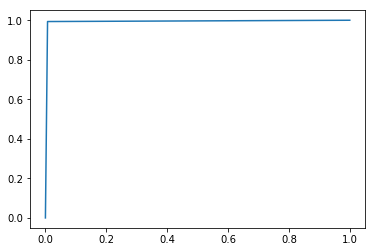

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pro = gs.best_estimator_.predict_proba(X_test)
fpr = roc_curve(y_test, y_pred)[0]
tpr = roc_curve(y_test, y_pred)[1]
plt.plot(fpr, tpr)

In [65]:
y_pred = gs.best_estimator_.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[24116,   167],
       [  103, 15792]])

In [66]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.99327990442530734

## Feature ranking and selection

## Use RFE to eliminate crappy inputs
https://medium.com/@aneesha/recursive-feature-elimination-with-scikit-learn-3a2cbdf23fb7

In [34]:
from sklearn.feature_selection import RFE
rfe = RFE(lm_final, 3)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False False False False  True  True False False
 False False False False False False]
[11  1 12  8  7 10  6  5  1  1 16 15  4 14  2  9  3 13]


In [35]:
rfe

RFE(estimator=LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=3, step=1, verbose=0)

In [36]:
rfe = RFE(lm_final)
fit = rfe.fit(X, y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: 9
Selected Features: [False  True False False  True False  True  True  True  True False False
  True False  True False  True False]
Feature Ranking: [ 5  1  6  2  1  4  1  1  1  1 10  9  1  7  1  3  1  8]


In [37]:
select = fit.support_.tolist()
ranks = fit.ranking_.tolist()

In [38]:
feature_select = pd.DataFrame({'features':inputs, 'select': select, 'rank' : ranks})
ranked_features = feature_select.sort_values(['rank'])

In [39]:
new_inputs = ranked_features['features'][:10].tolist()
ranked_features

,features,rank,select
8,numbers,1,True
1,num_density,1,True
4,gibberish_max,1,True
6,words_avg,1,True
7,words_max,1,True
16,2LD_entropy,1,True
9,other_chars,1,True
14,tld_length,1,True
12,entropy,1,True
3,gibberish_avg,2,False


In [40]:
new_inputs

['numbers',
 'num_density',
 'gibberish_max',
 'words_avg',
 'words_max',
 '2LD_entropy',
 'other_chars',
 'tld_length',
 'entropy',
 'gibberish_avg']

In [41]:
df[new_inputs].corr()

,numbers,num_density,gibberish_max,words_avg,words_max,2LD_entropy,other_chars,tld_length,entropy,gibberish_avg
numbers,1.000000,0.956760,0.539818,-0.320028,-0.301923,0.419275,-0.059571,0.297879,0.515210,0.436757
num_density,0.956760,1.000000,0.496467,-0.293433,-0.281618,0.370504,-0.056414,0.298787,0.449271,0.405878
gibberish_max,0.539818,0.496467,1.000000,-0.582718,-0.559094,0.583560,-0.069181,-0.139009,0.661749,0.959133
words_avg,-0.320028,-0.293433,-0.582718,1.000000,0.941734,-0.390307,0.127464,0.278169,-0.392794,-0.553499
words_max,-0.301923,-0.281618,-0.559094,0.941734,1.000000,-0.350892,0.131843,0.304047,-0.332467,-0.527940
2LD_entropy,0.419275,0.370504,0.583560,-0.390307,-0.350892,1.000000,-0.026813,0.101984,0.801718,0.519671
other_chars,-0.059571,-0.056414,-0.069181,0.127464,0.131843,-0.026813,1.000000,0.069472,-0.020472,-0.053514
tld_length,0.297879,0.298787,-0.139009,0.278169,0.304047,0.101984,0.069472,1.000000,-0.054931,-0.166251
entropy,0.515210,0.449271,0.661749,-0.392794,-0.332467,0.801718,-0.020472,-0.054931,1.000000,0.578714
gibberish_avg,0.436757,0.405878,0.959133,-0.553499,-0.527940,0.519671,-0.053514,-0.166251,0.578714,1.000000


In [77]:
collinears = ['numbers', 'num_density', 'words_avg', 'words_max', 'gibberish_avg', 'gibberish_max', 'entropy', '2LD_entropy']

df[collinears].corr()[collinears]

,numbers,num_density,words_avg,words_max,gibberish_avg,gibberish_max,entropy,2LD_entropy
numbers,1.000000,0.956760,-0.320028,-0.301923,0.436757,0.539818,0.515210,0.419275
num_density,0.956760,1.000000,-0.293433,-0.281618,0.405878,0.496467,0.449271,0.370504
words_avg,-0.320028,-0.293433,1.000000,0.941734,-0.553499,-0.582718,-0.392794,-0.390307
words_max,-0.301923,-0.281618,0.941734,1.000000,-0.527940,-0.559094,-0.332467,-0.350892
gibberish_avg,0.436757,0.405878,-0.553499,-0.527940,1.000000,0.959133,0.578714,0.519671
gibberish_max,0.539818,0.496467,-0.582718,-0.559094,0.959133,1.000000,0.661749,0.583560
entropy,0.515210,0.449271,-0.392794,-0.332467,0.578714,0.661749,1.000000,0.801718
2LD_entropy,0.419275,0.370504,-0.390307,-0.350892,0.519671,0.583560,0.801718,1.000000


Collinear features = (numbers, num_density), (words_avg, words_max), (gibberish_avg, gibberish_max), and (entropy, 2LD entropy).

based on rankings, I will choose:

numbers

words_avg

gibberish_avg

2LD_entropy

In [42]:
final_inputs = ['numbers',
 'gibberish_avg',
 'words_avg',
 'entropy',
 'other_chars',
 'tld_length', 
 'vowel_count']

In [43]:
df[final_inputs].corr()

,numbers,gibberish_avg,words_avg,entropy,other_chars,tld_length,vowel_count
numbers,1.000000,0.436757,-0.320028,0.515210,-0.059571,0.297879,-0.030093
gibberish_avg,0.436757,1.000000,-0.553499,0.578714,-0.053514,-0.166251,-0.291383
words_avg,-0.320028,-0.553499,1.000000,-0.392794,0.127464,0.278169,0.226721
entropy,0.515210,0.578714,-0.392794,1.000000,-0.020472,-0.054931,0.239795
other_chars,-0.059571,-0.053514,0.127464,-0.020472,1.000000,0.069472,0.071535
tld_length,0.297879,-0.166251,0.278169,-0.054931,0.069472,1.000000,0.123352
vowel_count,-0.030093,-0.291383,0.226721,0.239795,0.071535,0.123352,1.000000


In [45]:
lm_final = gs.best_estimator_
scores_final = cross_val_score(lm_final, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores_final, scores_final.mean()))

CV AUC [ 0.99812177  0.99777512  0.99768825], Average AUC 0.997861712448


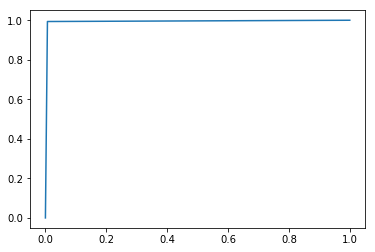

In [46]:
y_pro = gs.best_estimator_.predict_proba(X_test)
fpr = roc_curve(y_test, y_pred)[0]
tpr = roc_curve(y_test, y_pred)[1]
plt.plot(fpr, tpr)
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix
y_pred = gs.best_estimator_.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[23876,   407],
       [  351, 15544]])

In [48]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.98113395390512226

## Let me try some tree- based approaches

In [49]:
from sklearn.ensemble import RandomForestClassifier

feature_set = df[final_inputs]
X= feature_set
y = df['is_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=42)

kf = cross_validation.KFold(len(X_train), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=RandomForestClassifier(random_state = 42),
    param_grid={'max_depth': [i for i in range(3, 10)]},
    cv=kf,
    scoring='roc_auc'
)

gs.fit(X_train, y_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=93748, n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [50]:
rf_final = gs.best_estimator_
scores_final = cross_val_score(rf_final, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores_final, scores_final.mean()))

CV AUC [ 0.9995687   0.99917476  0.99917009], Average AUC 0.999304514288


In [51]:
from sklearn.metrics import confusion_matrix
y_pred = gs.best_estimator_.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[24151,   132],
       [  222, 15673]])

In [52]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.99118920802429189

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

feature_set = df[final_inputs]
X= feature_set
y = df['is_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=42)

kf = cross_validation.KFold(len(X_train), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid={'max_depth': [i for i in range(3, 10)]},
    cv=kf,
    scoring='roc_auc'
)

gs.fit(X_train, y_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=93748, n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [54]:
gb_final = gs.best_estimator_
scores_final = cross_val_score(rf_final, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores_final, scores_final.mean()))

CV AUC [ 0.99956918  0.99923161  0.99923953], Average AUC 0.999346772573


In [56]:
from sklearn.metrics import confusion_matrix
y_pred = gs.best_estimator_.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[24133,   150],
       [  146, 15749]])

In [57]:
score = accuracy_score(y_test, y_pred)
score

0.99263278411070732